In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Проектирование признаков (feature engineering)

стр 427

### Категориальные признаки

In [2]:
data = [
     {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
     {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
     {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
     {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
 ]

In [33]:
# прямое кодирование (one-hot encoding)
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [5]:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

In [36]:
pd.DataFrame(vec.fit_transform(data), columns=vec.get_feature_names_out())

,neighborhood=Fremont,neighborhood=Queen Anne,neighborhood=Wallingford,price,rooms
0,0,1,0,850000,4
1,1,0,0,700000,3
2,0,0,1,650000,3
3,1,0,0,600000,2


если количество значений категории велико, размер набора данных может значительно вырасти. Однако поскольку кодированные данные состоят в основном из нулей, эффективным решением будет разреженный формат вывода:

In [12]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### Текстовые признаки

**По количеству слов**: для каждого фрагмента текста подсчитывается количество вхождений в него каждого из слов, после чего результаты помещаются в таблицу

In [13]:
sample = ['problem of evil', 'evil queen', 'horizon problem']

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [24]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


**«терма-обратная частотность документа»** (term frequencyinverse document frequency) или TF-IDF. Cлова получают вес с учетом частоты их появления во всех документах

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Производные признаки

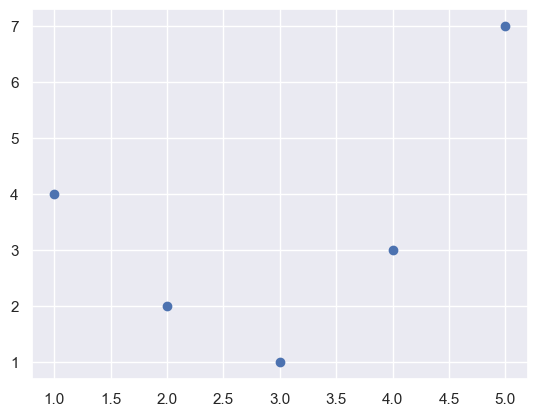

In [7]:
x = np.arange(1, 6)
y = np.array([4, 2, 1, 3, 7])
# данные, которые нельзя хорошо описать с помощью прямой линии
plt.scatter(x, y)

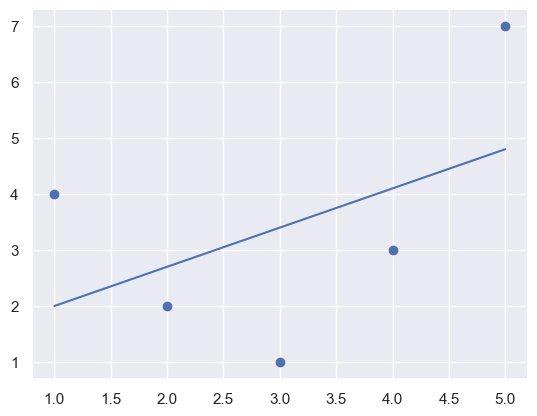

In [8]:
# линейная регрессия
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(X, yfit)

Требуется использовать более сложную модель, сделать это можно путем преобразования данных, добавив дополнительные столбцы признаков для увеличения гибкости модели

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
# 1 столбец - x
# 2 столбец - x^2
# 3 столбец - x^3
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

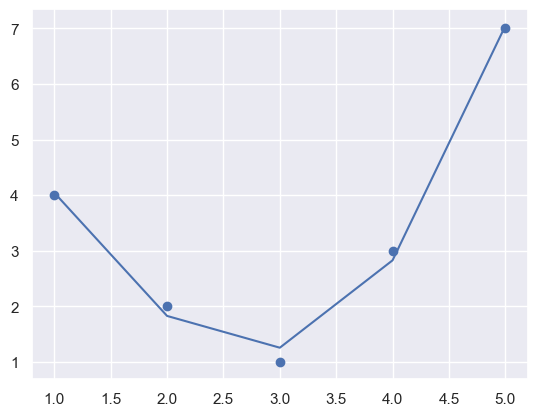

In [15]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

### Внесение отсутствующих данных

Часто встречающаяся задача в проектировании признаков — обработка
отсутствующих данных

In [19]:
# стандартный подход к заполнениню (imputation) пропущенных значений 
# (с использованием среднего значения, медианы или часто встречающегося значения)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')

In [22]:
X = np.array([[np.nan, 0, 3 ],
             [3, 7, 9 ],
             [3, 5, 2 ],
             [4, np.nan, 6 ],
             [8, 8, 1 ]])
y = np.array([14, 16, -1, 8, -5])

In [23]:
X2 = imp.fit_transform(X)
# получили данные, в которых два пропущенные значения заменены
# на среднее значение остальных элементов соответствующего столбца
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

### Конвейеры признаков

Конвейер используется для организации потоковой обработки.

Например:
1. Внести вместо отсутствующих данных средние значения.
2. Преобразовать признаки в квадратичные.
3. Обучить модель линейной регрессии.

In [24]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(
    SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=2),
    LinearRegression()
)

In [26]:
model.fit(X, y)
model.predict(X)

array([14., 16., -1.,  8., -5.])